## Group Members:

Kevin McManus

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Lab 6 -- Transiting exoplanet from TESS

## Plase write your group members' names at the top of this assignment!

In this lab we will explore the transit method for detecting and characterizing extrasolar planets, using real data from the TESS mission

In [2]:
# load the data and print out variable names
f = fits.open('hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits')
print(f.info())
print(f[1].data.names)

Filename: hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU     65   1148R x 13C   [D, J, E, E, E, J, J, E, E, E, E, E, E]   
None
['TIME', 'CADENCENO', 'SAP_FLUX', 'KSPSAP_FLUX', 'KSPSAP_FLUX_ERR', 'QUALITY', 'ORBITID', 'SAP_X', 'SAP_Y', 'SAP_BKG', 'SAP_BKG_ERR', 'KSPSAP_FLUX_SML', 'KSPSAP_FLUX_LAG']


## Exploratory Data Analysis

In [4]:
import pandas as pd
from astropy.table import Table
df = Table(f[1].data).to_pandas().set_index('CADENCENO')
df

,TIME,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
CADENCENO,,,,,,,,,,,,
37575,2010.283939,1.000468,1.000809,0.001161,4096,59,1173.880249,507.515961,216.759995,481.130005,1.000980,1.001570
37576,2010.304773,0.999518,1.001253,0.001161,4096,59,1173.874756,507.519775,190.839996,403.519989,1.001543,1.001355
37577,2010.325607,1.000795,0.998412,0.001161,4096,59,1173.873535,507.523071,269.670013,536.530029,0.999067,0.997812
37578,2010.346440,0.996093,1.000799,0.001161,4096,59,1173.870361,507.524628,378.170013,438.429993,1.000010,1.000583
37579,2010.367274,0.997845,1.000612,0.001161,4096,59,1173.871826,507.523132,241.669998,415.440002,0.999893,1.000836
...,...,...,...,...,...,...,...,...,...,...,...,...
38763,2035.034213,1.002035,1.000242,0.001161,4096,60,1173.918091,507.498474,297.200012,638.750000,1.000485,1.000163
38764,2035.055046,0.999906,0.999026,0.001161,4096,60,1173.919556,507.502869,534.760010,740.979980,0.998805,0.999381
38765,2035.075880,1.000654,0.999485,0.001161,0,60,1173.922974,507.500366,556.140015,692.900024,0.999774,0.999480


### Analysis of the Time Variable

TIME variable appears to be some variant of MJD where the integer portion is a day, decimal is fraction of day: seconds after midnight divided by total seconds per day

* are the observations regularly spaced?
* are the observations contiguous or are there discontinuities?

In [5]:
seconds_per_day = 24*60*60 # maybe should use sidereal day?
#seconds_per_day =  23*60*60+ 56*60 + 4.1
#Time values regularly spaced?
t = np.array(df.TIME)
delta_t = t[1:]-t[:-1]
delta_t*seconds_per_day

array([1800.02778412, 1800.02779195, 1800.02780241, ..., 1800.01223796,
       1800.01210698, 1800.01198208])

Observations appear to be 1800 seconds apart (30 minutes and (small) change), equally spaced; not sure why it isn't 30 minutes exactly

In [6]:
#find max time between observations, and its index
print(f'max time btwn obs: {delta_t.max():.4f} days, index into data frame: {delta_t.argmax()}; hours: {delta_t.max()*24:.4f}')

max time btwn obs: 0.9583 days, index into data frame: 571; hours: 23.0002


In [7]:
df.iloc[569:575]

,TIME,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
CADENCENO,,,,,,,,,,,,
38144,2022.138294,1.000617,1.000653,0.001161,4096,59,1173.921387,507.557526,383.480011,826.489990,0.999106,0.999789
38145,2022.159127,0.999037,0.999073,0.001161,4096,59,1173.924072,507.556427,499.929993,681.489990,0.997773,0.997518
38146,2022.179961,1.000876,1.000913,0.001161,4096,59,1173.925781,507.554108,455.750000,793.070007,0.999531,0.999630
38192,2023.138304,1.000380,1.000464,0.001161,4096,60,1173.891357,507.465210,378.130005,507.149994,1.000029,1.000549
38193,2023.159137,1.000106,1.001550,0.001161,0,60,1173.889648,507.471375,398.730011,505.600006,1.001302,1.001671
38194,2023.179971,1.000386,1.001614,0.001161,4096,60,1173.886841,507.473694,284.649994,470.200012,1.002144,1.001283


big discontinuity when ORBITID rolls from 59 to 60. Twenty-three hours between last observation during orbit 59 and first observation of obrit 60. Also 46 steps between cadence count from the two orbits.

In [12]:
#what's with the orbits?
np.unique(df.ORBITID)

array([59, 60])

Only two orbits in the data frame; Looks like two sets of observations, one for each orbit.

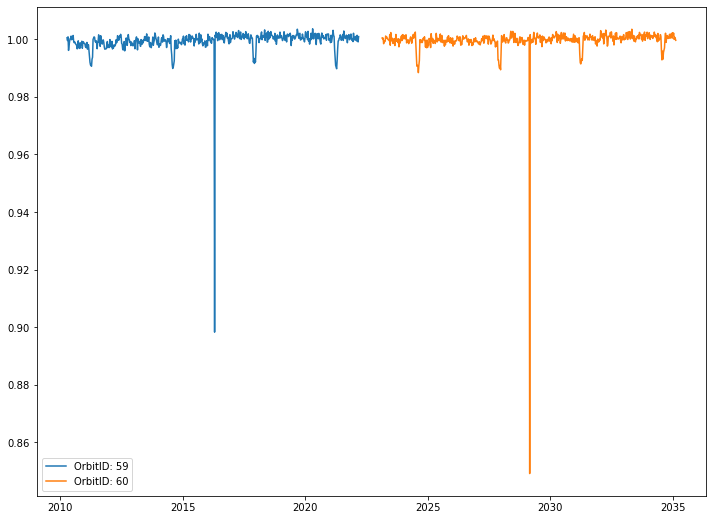

In [45]:
#plot the obvious measurement variable: SAP_FLUX for the two different orbits
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot()
for o in df.groupby('ORBITID'):  
    ax.plot(o[1].TIME, o[1].SAP_FLUX, label=f'OrbitID: {o[0]}')
#ax.set_ylim(0.985,1.005)
ax.legend()

Text(0.5, 1.0, 'SAP_X and SAP_Y')

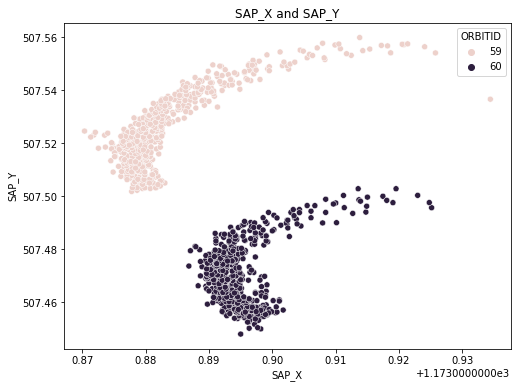

In [46]:
#how do the other measures change depending on ORBITID?
import seaborn as sns 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
sns.scatterplot(x='SAP_X', y='SAP_Y', hue='ORBITID', data=df, ax=ax)
ax.set_title('SAP_X and SAP_Y')

The two figures above show the 'disjointed-ness' of the data with respect to the `ORBITID`. Therefore in the analysis below, we'll treat these as two distinct dataset and summarize across the two distinct sets.

## Find the Peaks (Dips) in the Light Curves

Use `scipy.signal.find_peaks` to identify the dips in the light curves and the frequency at which they occur.  `find_peaks` looks for peaks so we'll invert the flux variable `SAP_FLUX` by multiplying by -1 to find dips as opposed to peaks.

Each orbit has a single outlier data point, let's set the minimum peak width to be 2 or greater so that we exclude the outliers from the peak finder.

In [15]:
from scipy.signal import find_peaks

#analyze each orbit separately and collect results in dict indexed by orbit id
peak_info={}
for o in df.groupby('ORBITID'):
    k = f'Orbit{o[0]}'
    flux = o[1].SAP_FLUX

    peaks, proms = find_peaks(-1.0*flux,width=(2,10), prominence=0.0075)

    peak_info[k] = {'peaks': peaks, 'proms':proms}


In [17]:
#further analysis on the peaks
#get the times and time deltas at which peak flux occurred for each orbit
for o in df.groupby('ORBITID'):
    k = f'Orbit{o[0]}'

    peak_times = np.array(o[1].TIME.iloc[peak_info[k]['peaks']])
    peak_values = np.array(o[1].SAP_FLUX.iloc[peak_info[k]['peaks']])

    peak_info[k]['proms']['peak_times'] = peak_times
    peak_info[k]['proms']['delta_t'] = peak_times[1:] - peak_times[:-1] #times between peaks
    peak_info[k]['proms']['peak_values'] = peak_values
    peak_info[k]['proms']['peak_depths'] = 1.00 - peak_values

    #transit times
    t_start =  np.array(o[1].TIME.iloc[peak_info[k]['proms']['left_ips']])
    t_end =  np.array(o[1].TIME.iloc[peak_info[k]['proms']['right_ips']])
    peak_info[k]['proms']['transit_times'] = t_end - t_start



#get the delta times and depths into one array
delta_t = np.concatenate([ peak_info[pi]['proms']['delta_t'] for pi in peak_info])
depths = np.concatenate([ peak_info[pi]['proms']['peak_depths'] for pi in peak_info])
transit_times = np.concatenate([ peak_info[pi]['proms']['transit_times'] for pi in peak_info])

print(f'Mean orbital period: {delta_t.mean():.2f} days, standard deviaion: {delta_t.std(ddof=1):.2f} days')
print(f'Mean depth: {depths.mean():.4f}, standard deviaion: {depths.std(ddof=1):.4f}')
print(f'Mean transit time: {transit_times.mean():.2f} days, standard deviaion: {transit_times.std(ddof=1):.2f} days')


Mean orbital period: 3.32 days, standard deviaion: 0.03 days
Mean depth: 0.0096, standard deviaion: 0.0014
Mean transit time: 0.14 days, standard deviaion: 0.02 days


In [18]:
peak_info['Orbit59']

{'peaks': array([ 48, 207, 367, 528], dtype=int64),
 'proms': {'prominences': array([0.01069152, 0.0122627 , 0.01142526, 0.0131107 ]),
  'left_bases': array([ 12, 172, 336, 481], dtype=int64),
  'right_bases': array([172, 259, 481, 542], dtype=int64),
  'widths': array([7.33355539, 6.15406815, 6.48146685, 5.83784268]),
  'width_heights': array([-0.99592882, -0.99595207, -0.99727523, -0.99627408]),
  'left_ips': array([ 43.02256828, 204.34412381, 363.79431197, 524.05881527]),
  'right_ips': array([ 50.35612367, 210.49819197, 370.27577883, 529.89665795]),
  'peak_times': array([2011.28395502, 2014.59650812, 2017.92989386, 2021.28411293]),
  'delta_t': array([3.3125531 , 3.33338574, 3.35421906]),
  'peak_values': array([0.99058306, 0.9898207 , 0.9915626 , 0.98971874], dtype=float32),
  'peak_depths': array([0.00941694, 0.01017928, 0.0084374 , 0.01028126], dtype=float32),
  'transit_times': array([0.14583564, 0.125002  , 0.14583559, 0.10416835])}}

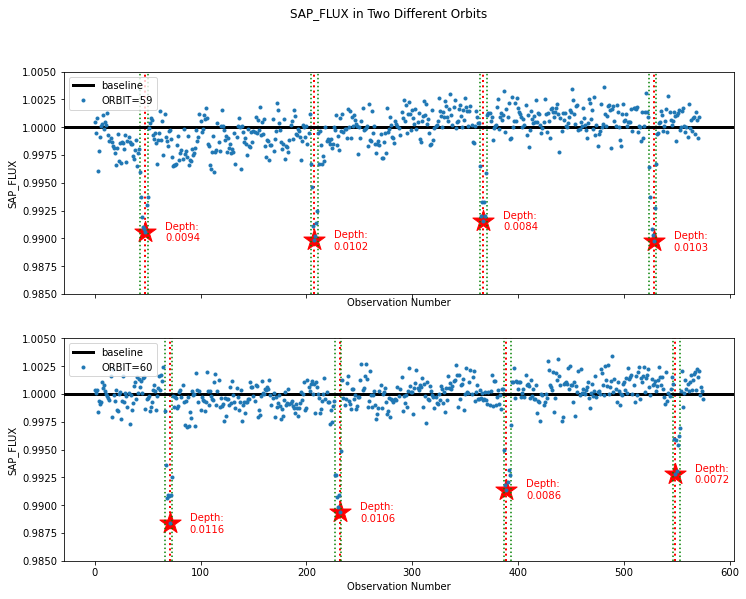

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(12,9), sharex=True)

for a,o in zip(ax, [59,60]):
    flux = df.query('ORBITID==@o').reset_index().SAP_FLUX

    k = f'Orbit{o}'
    peaks = peak_info[k]['peaks']
    proms = peak_info[k]['proms']

    for i in range(len(peaks)):
        a.axvline(peaks[i], ls=':', lw=2, color='red')
        a.axvline(proms['left_ips'][i], ls=':', color='green')
        a.axvline(proms['right_ips'][i], ls=':', color='green')

    a.scatter(peaks, proms['peak_values'], s=500, marker='*', color='red')
    for i in range(len(peaks)):
        d = 1.0 - proms['peak_values'][i]
        a.annotate(f'Depth:\n{d:.4f}',(peaks[i], proms['peak_values'][i] ),
            xytext=(20,0), textcoords='offset points',
         va='center', color='red')

    #baseline from which to measure peak height (depth, actually)
    a.axhline(1.00, color='black', lw=3, label='baseline')


    a.plot( flux, label=f'ORBIT={o}', ls='None', marker='.')
    a.set_ylim(0.985,1.005)
    a.set_xlabel('Observation Number')
    a.set_ylabel('SAP_FLUX')
    #a.axhline(lo_lim, ls=':', lw=2, color='red', label='Eclipse Low Limit')
    #a.axhline(hi_lim, ls=':', lw=2, color='green', label='Eclipse Hi Limit')
    a.legend(loc='upper left')

zz=fig.suptitle('SAP_FLUX in Two Different Orbits')

### 1. Sample TESS transit light curve

The data are stored in the "LIGHTCURVE" portion of the FITS file, with 
variable names listed above. Looking at those, choose one that you think could represent the flux of the star vs time and write its name as flux_variable_name below. If there is more than one thing you think might be right try them out and see which one makes the most sensible plot!

In [20]:
# write the variable name below
flux_variable_name='SAP_FLUX'

### 2. Identify and mark transit signatures

The plot below should make a light curve (flux of the star vs time).

Mark any promising transit signals (periodic drops in brightness) on the light curve plot. Fill in the time in days of the first transit, the period, and the depth of the signal in the variables below and then run the code to mark the transits on the plot.


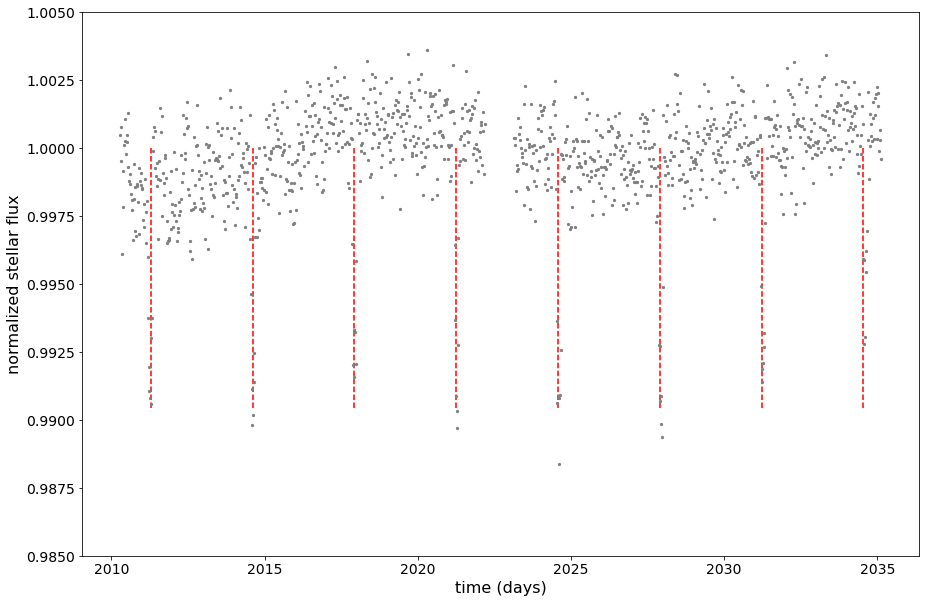

In [21]:
time_variable=f[1].data.field('TIME')
flux_variable=f[1].data.field(flux_variable_name)

fig = plt.figure(figsize=(15,10))
#plt.plot(time_variable,flux_variable,color='k')
plt.scatter(time_variable,flux_variable,color='grey',s=5,zorder=3,marker='o')
plt.ylim(0.985,1.005)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# replace these numbers with your own measurements!
first_transit_time=peak_info['Orbit59']['proms']['peak_times'][0]
period=delta_t.mean()
depth=depths.mean()

for i in range(8):
   plt.plot(first_transit_time+i*period+np.zeros(50),depth*np.arange(50)/49.+(1.-depth),linestyle='--',color='red')

### 3. Transit duration and depth

Use the plot below to zoom in on one of the transits and measure its duration + depth.

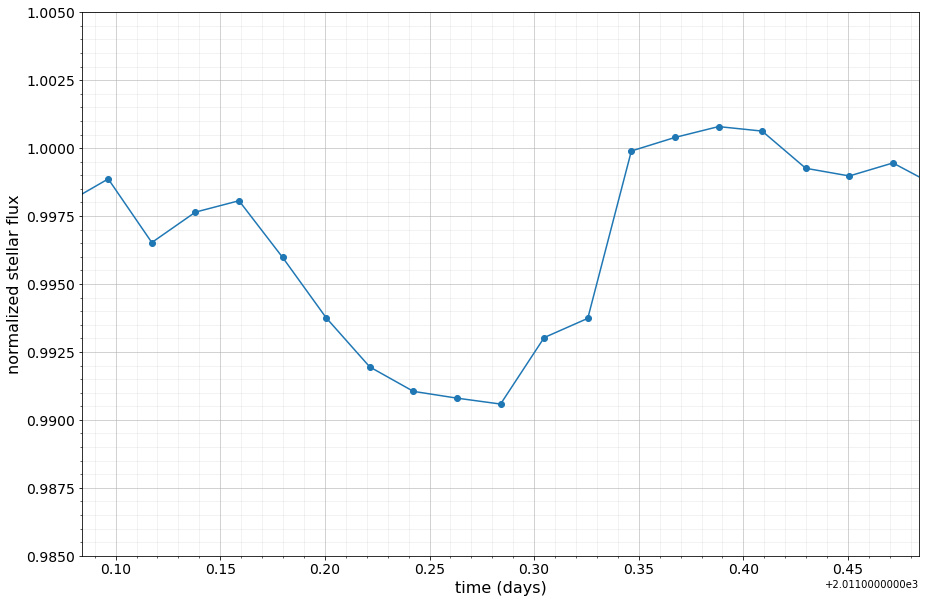

In [59]:


fig = plt.figure(figsize=(15,10))

plt.plot(time_variable,flux_variable,marker="o")
plt.ylim(0.985,1.005)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.yaxis.set_tick_params(labelsize=14);ax.xaxis.set_tick_params(labelsize=14)
plt.grid(b=True,which='minor',alpha=0.2);plt.grid(b=True,which='major',alpha=0.7)
plt.minorticks_on()
plt.xlim(first_transit_time-0.2,first_transit_time+0.2)
#plt.xlim(first_transit_time, first_transit_time+delta_t.mean())
ax.xaxis.grid(True,which='minor')

### your estimated duration: [days]
### your estimated depth: 

In [22]:
print(f'Mean orbital period: {delta_t.mean():.2f} days, standard deviaion: {delta_t.std(ddof=1):.2f} days')
print(f'Mean depth: {depths.mean():.4f}, standard deviaion: {depths.std(ddof=1):.4f}')
print(f'Mean transit time: {transit_times.mean():.2f} days, standard deviaion: {transit_times.std(ddof=1):.2f} days')

Mean orbital period: 3.32 days, standard deviaion: 0.03 days
Mean depth: 0.0096, standard deviaion: 0.0014
Mean transit time: 0.14 days, standard deviaion: 0.02 days


### 4. The radius of the exoplanet

Write an equation for the radius of the exoplanet. What quantity does it depend on that we haven't measured from the transit light curve? [*Hint*: what ratio should the amount of light blocked depend on?]

Find the needed information in the FITS file header below, and solve for the radius of the planet in units of Earth radii.

Let $A_{Star}$ and $A_{Planet}$ represent the areas of the star and its orbiting planet, respectively.  Wnen the planet is eclipsing the star, the star's flux drops by the amount of the star's area that is obscured by the planet's area.  Thus

$$
\frac{A_{Star}-A_{Planet}}{A_{Star}} = \frac{F_{NoEclipse} - F_{Eclipse}}{F_{NoEclipse}}
$$

The numerator of the right term is one minus the depth of the light curve; the demominator is normalized to 1.0 in the data set, so the above equation becomes:
$$
A_{Planet} = D_{LC}*A_{Star}
$$
where $D_{LC}$ is the depth of the light curve.

The meta data in the `fits` file supplies the radius of the star, thus we know its area; from the data in the `fits` file, we can calculate the light curve depth, so we can calculate the area and thus the radius of the planet as follows:

In [30]:
r_sun = 7e10 #cm
r_earth = 6.4e8 #cm
r_jupiter = 7e9 #cm

c = f[0].header.comments['RADIUS']
r = f[0].header.get('RADIUS')
r_star = r_sun * r

mean_depth = depths.mean()

a_star = np.pi*r_star**2
a_planet = mean_depth * a_star
r_planet = np.sqrt(a_planet/np.pi)

print(f'Main object (star) radius is {r} {c} or {r_star:.2e} cm, star area: {a_star:.2e} cm^2')
print(f'Planet Area: {a_planet:.2e} cm^2, planet_radius: {r_planet:.2e} cm, or {r_planet/r_earth:.2f} Earth radii or {r_planet/r_jupiter:.2f} Jupyter radii')


Main object (star) radius is 1.69483 [solar radii] stellar radius or 1.19e+11 cm, star area: 4.42e+22 cm^2
Planet Area: 4.22e+20 cm^2, planet_radius: 1.16e+10 cm, or 18.12 Earth radii or 1.66 Jupyter radii


### 5. Transit duration and orbital semi-major axis

Use your measured transit duration and period to solve for the semi-major axis of the binary orbit. Express your answer in terms of the Earth-Sun distance 1AU = 1.5x10^13 cm. You may assume that the inclination is exactly edge-on ($i = 90^\circ$), although note that we do not know that here! [*Hint*: how far does the exoplanet travel during the transit?]

Using the semi-major axis and Kepler's 3rd law, solve for the total mass of the system. [Note: if you see the mass reported in the header above and are confused by the large discrepancy...so am I. It's definitely wrong so don't be distracted by it].

Keplers Law:
$$
\left(\frac{P}{1\ Year}\right)^2 = \left(\frac{d}{1\ AU}\right)^3
$$
which we will solve for $d$.

A more elaborate version of Kepler's Law is:
$$
\omega^2 = \frac{G*M_{Total}}{a^3}
$$
where $a$ is the semi-major axis (or $d$ from above) and $\omega$ is the angular frequency of the orbit.  We solve this equation for $M_{Total}$ after converting all of  the parameters to $cgs$ units.

In [33]:
A_U = 1.5e13 #cm
seconds_per_day = 24*60*60
seconds_per_year = seconds_per_day*365
G = 6.7e-8 #erg cm g^-2
m_sun = 2e33 #gram


p_day = delta_t.mean() #period in days
p_year = p_day*seconds_per_day/seconds_per_year
p_sec = p_day*seconds_per_day
omega = 2*np.pi/p_sec # rotational frequency in Hz

d_au = np.power(p_year**2, 1.0/3.0)
d_cm = d_au* A_U

m_total = omega**2*d_cm**3/G

print(f'Semi major axis: {d_au:.2f} AU or {d_cm:.2e} cm')

print(f'Total System Mass: {m_total:.2e} grams or {m_total/m_sun:.2f} Solar masses')

Semi major axis: 0.04 AU or 6.54e+11 cm
Total System Mass: 2.00e+33 grams or 1.00 Solar masses


### 6. Planet mass from the radial velocity

This system also has radial velocity measurements, which show a line of sight velocity amplitude of $0.04$ km s$^{-1}$. Solve for the mass of the planet, assuming it is much smaller than that of its host star. [*Hint*: recall the binary mass function!]

In the case in which the mass of the planet is negligible with respect to the star it orbits, the binary mass function becomes:
$$
M_p\sin i = (\omega G)^{-1/3}*|vr_{Star}|*M_{Star}^{2/3}
$$

where $i$ is the angle of inclination and we're assuming we're looking edge on, so $\sin i = 1$.

In [42]:
cm_per_km = 1e5
rv_planet = 0.04*cm_per_km
m_earth = 6.0e27 #g
m_jupiter = 1.9e30

#planet's mass wrt star is negligible; thus star is total mass
m_star = m_total

m_planet = np.abs(rv_planet)*np.power(omega*G, -1.0/3)*np.power(m_star, 2.0/3.0) 

print(f'Mass of Planet: {m_planet:.2e} grams or {m_planet/m_earth:.2f} Earth Masses or {m_planet/m_jupiter:.2f} Jupiter masses')


Mass of Planet: 5.59e+29 grams or 93.14 Earth Masses or 0.29 Jupiter masses


### 7. Daytime temperature

Given the effective temperature of the star above, how would the daytime temperature of the planet compare to that of Earth? [*Hint*: if you assume the only thing heating the planet is the incident starlight, what should this ratio depend on?]

Radiation Equilibrium Temperature:
$$
T_{Planet} = T_{Star}\left(\frac{r_{star}}{2d_{star}}\right)^\frac{1}{2}
$$

In [44]:
teff_c = f[0].header.comments['TEFF']
teff = f[0].header.get('TEFF')

print(f'Star Effective Temperature: {teff:.2f}, comment: {teff_c}')

t_planet = teff*np.sqrt(r_star/(2.0*d_cm))

print(f'Planet temperature: {t_planet:.2f} K')

Star Effective Temperature: 5835.00, comment: [K] effective temperature
Planet temperature: 1757.31 K


### 8. Characterize the star - exoplanet system

Using your results above, how do the properties of this extrasolar planet compare to those in the Solar system? Which planet is it most similar to in radius and mass? Is its orbital location similar to where that planet is found in the Solar system?

Properties of solar system planets are listed e.g. at this link
https://nssdc.gsfc.nasa.gov/planetary/factsheet/

> The star is 1.7 solar raidus and its mass is exactly that of the Sun. The star has rougly the same temperature as the Sun. So pretty similar to the solar system, so far.

> The planet unlike the Earth, orbits the star at at 0.04 AU which is closer to the star than Mercury is to the Sun (0.04 AU v. 0.38 AU). Consequently the radiation temperature of the planet is 1757 K versus about 270 K for Earth -- much hotter and way too hot to maintain liquid water.  The planet mass is 93 times that of Earth or about 30 % of Jupiter mass. THe planet is 66% larger diameter than Jupiter. So it is larger in volume and less massive than Jupiter, therefore a lot less dense than Jupyter.  It's proximity to its star and consequent heating might account for its low density with respect to Jupiter.